# Analyze car paremeters

I use data from [otomoto.pl](https://www.otomoto.pl/osobowe) acces on filename (DD_MM_YYYY_hh_mm)

Main goal of analyze is found driver profiles for model.

In [9]:
import os
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CV = "CV"
EV = "EV"
PHEV = "PHEV"
car_types = [CV, PHEV, EV]

### set plot params

In [26]:
plt.style.use('dark_background')
plt.rc('grid', alpha=0.3)
kde_params = {
    "fill": True,
    "linewidth": 1,
    "common_norm": False,
}

hist_params = {
    "fill": True,
    "linewidth": 0,
    "common_norm": False,
    "common_bins": False,
    "kde": True,
    "stat": "probability",
}


### Set data

In [11]:
data_file = os.sep.join(["..", "data", "cars02_05_2023_01_21.csv"])
df = pd.read_csv(data_file)

aliases = {
    "petrol": CV,
    "diesel": CV,
    "petrol-lpg": CV,
    "petrol-cng": CV,
    "electric": EV,
    "hybrid": PHEV,
}

df["type"] = df["fuel_type"].apply(lambda x: aliases[x])

today_year = datetime.date.today().year
today_year = 2023
df["age"] = df["year"].apply(lambda x: today_year - x)

df["mean_year_miliage"] = df.apply(
    lambda row: row["mileage"] // row.age if row.age != 0 else None,
    axis=1)



# Age car analise

In [20]:
suggest_shelf_life = {}

for c_type in car_types:
    suggest_shelf_life[c_type] = df[(df["type"] == c_type) & (df["age"] > 0)]["age"].quantile(0.9)


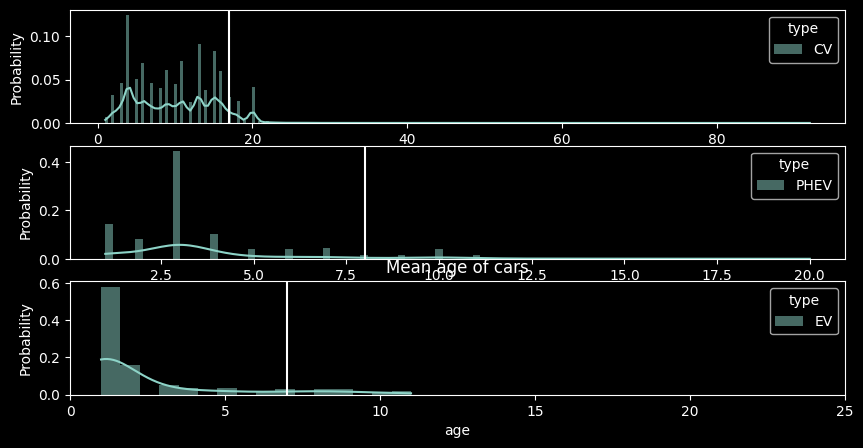

In [34]:
fig, ax = plt.subplots(nrows = 3,figsize = (10,5))

for i, c_type in enumerate(car_types):
    sns.histplot(
        df[(df["age"] > 0) & (df["type"] == c_type)],
        ax = ax[i],
        x = "age",
        hue="type",
        **hist_params,
        );


# for key in suggest_shelf_life:
    ax[i].axvline(x=suggest_shelf_life[c_type])

# plt.ylim([0,1])
plt.xlim([0,25])

plt.title("Mean age of cars");


<Axes: xlabel='type', ylabel='age'>

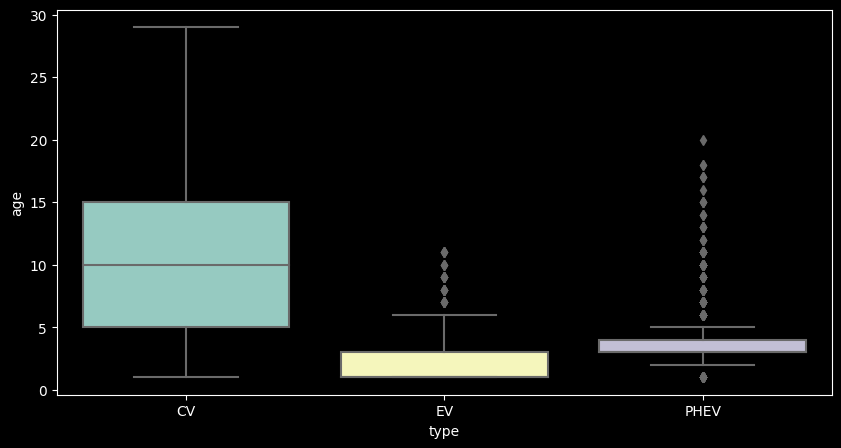

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(
    df[(df["age"] < 30) & (df["age"] > 0)],
    y="age",
    x = "type"
    )


In [37]:
suggest_shelf_life

{'CV': 17.0, 'PHEV': 8.0, 'EV': 7.0}